# Python Coding Tutorials

Joseph Chao-Chung Kuo

This tutorial includes two parts:

- Part 1: Python Fundamentals for introducing the basics of Python, including syntax, variables, and control structures.
- Part 2: Practice for solving problems using Python by applying concepts learned in Part 1.

## Part 1: Python Fundamentals

This part doesn't aim to offer a complete overview of Python, but rather to introduce the basics of the language and get you started with some simple exercises.

---

### **1. Introduction to Python Basics**
Python is a high-level programming language widely used in various fields such as data science, bioinformatics, web development, and automation. It's known for its simplicity and readability. In Python, you write code in a script, and the interpreter executes it line by line. 

A typical Python script begins with importing necessary libraries, defining functions, and performing actions, which will be executed when the script is run.

---

### **2. Importing Libraries**
In Python, you can reuse existing code by importing libraries. These libraries are collections of pre-built functions and classes that help you perform common tasks.

For example:
```python
import matplotlib.pyplot as plt
from collections import defaultdict
```
- **`matplotlib.pyplot`**: This library is used for plotting and visualizing data.
- **`defaultdict`**: This is a special type of dictionary that simplifies working with missing keys by automatically creating a default value for them.

---

### **3. Functions in Python**
A **function** is a block of organized, reusable code that performs a single task. Functions are defined using the `def` keyword, followed by the function name and parentheses.

For example:
```python
def parse_gtf(gtf_file):
    # Function body
    return result
```

Functions take **arguments** (inputs), process the information, and return a result. Functions help you reuse code and make programs more organized and easier to understand.

---

### **4. Control Flow**
Control flow determines the order in which code is executed. Python uses conditional statements (`if`, `elif`, `else`) and loops (`for`, `while`) to control the flow of the program.

#### **If Statements**
The `if` statement allows you to check conditions and execute code accordingly.

For example:
```python
if line.startswith("#"):  # Skip header lines
    continue
```
This checks if a line starts with a `#` (a comment in the GTF file), and if true, the `continue` statement skips to the next line.

#### **For Loops**
A `for` loop allows you to iterate over items, such as lines in a file.

For example:
```python
for line in file:
    # Process each line of the file
```
This loop processes each line in the file sequentially.

---

### **5. Data Structures**
Python provides several built-in data structures for storing and managing collections of data.

#### **Lists**
A list is an ordered collection of items. You can create a list using square brackets `[]` and access individual elements using indexing.

For example:
```python
fields = line.strip().split('\t')  # Split a line into fields
```
This code takes a line of the GTF file, removes surrounding whitespace with `strip()`, and splits it into a list of fields based on the tab (`\t`) character.

#### **Dictionaries**
A dictionary is a collection of key-value pairs. `defaultdict` is a special kind of dictionary that provides a default value for missing keys.

For example:
```python
gene_dict = defaultdict(set)
```
This creates a dictionary where each key points to a set. This is useful when we want to collect unique items (e.g., transcripts) for each gene.

---

### **6. String Manipulation**
Strings are sequences of characters in Python. You can manipulate strings in many ways, including splitting them into parts, joining them, and replacing values.

For example, to split the attributes field in a GTF file:
```python
attributes_field = fields[8]
attributes = attributes_field.split(';')
```
This code splits the attribute field of a GTF file (the 9th field) into multiple components using the semicolon (`;`) as a delimiter.

---

### **7. Working with Files**
In Python, you can read and write files using the `open()` function. When reading files, it's a good practice to use a `with` statement to ensure the file is properly closed afterward.

For example:
```python
with open(gtf_file, 'r') as file:
    for line in file:
        # Process the file
```
This opens the GTF file for reading (`'r'`) and iterates over each line. The `with` statement automatically closes the file once the block is completed.

---

### **8. Plotting with Matplotlib**
Python's `matplotlib` library allows you to create plots and visualizations. In this case, we use it to create histograms that show the distribution of transcripts per gene and exons per transcript.

For example:
```python
plt.hist(transcripts_per_gene, bins=100, color='blue', edgecolor='black', log=True)
plt.title('Number of Transcripts per Gene')
```
This code creates a histogram with 100 bins, uses blue for the bars, and applies a logarithmic scale to the y-axis.

#### **Subplots**
You can create multiple plots in the same figure using subplots. This allows us to visualize different data in one figure.

For example:
```python
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
```
This creates a grid with 1 row and 2 columns, and the `1` refers to the first plot in that grid.

---

## Part 2: Practice for solving problems using Python

Here we want to apply what we have learned in the course to solve some problems.

GTF (Gene Transfer Format) is a standard file format used in genomics to store gene annotations. Each line of the file represents a gene and contains information such as gene name, chromosome, start and end positions, strand, and other relevant information.

We need to write a Python program that can read a GTF file and 

1. count **the number of transcripts for each gene** and 
2. count **the number of exons for each transcript**.

### 1. Create a Conda environment and install the required packages

**%%sh** at the top of a cell indicates that the cell should be run in the terminal.

In [ ]:
%%sh
conda create --name myenv python=3.11 wget matplotlib seaborn wget ipykernel
conda activate myenv

### 2. Download the latest version of GTF for mouse genome from [Gencode website](https://www.gencodegenes.org/mouse/).

In [1]:
%%sh
# Use wget to download the GTF file from the EBI FTP server
wget https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M35/gencode.vM35.annotation.gtf.gz
# Use gunzip to uncompress the GTF file
gunzip gencode.vM35.annotation.gtf.gz

--2024-09-09 19:59:00--  https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M35/gencode.vM35.annotation.gtf.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29303645 (28M) [application/x-gzip]
Saving to: ‘gencode.vM35.annotation.gtf.gz’

     0K .......... .......... .......... .......... ..........  0% 1,51M 18s
    50K .......... .......... .......... .......... ..........  0% 1,80M 17s
   100K .......... .......... .......... .......... ..........  0% 1,66M 17s
   150K .......... .......... .......... .......... ..........  0% 1,76M 17s
   200K .......... .......... .......... .......... ..........  0% 1,64M 17s
   250K .......... .......... .......... .......... ..........  1% 2,83M 15s
   300K .......... .......... .......... .......... ..........  1% 2,33M 15s
   350K .......... .......... .......... .......... .......... 

### 3. Understand the format of GTF

The GTF (Gene Transfer Format) file is a tab-delimited file that contains information about gene annotations. It is a standard file format used by many bioinformatics tools for gene annotation.

In [2]:
%%sh
head -n 20 gencode.vM35.annotation.gtf

##description: evidence-based annotation of the mouse genome (GRCm39), version M35 (Ensembl 112)


##provider: GENCODE
##contact: gencode-help@ebi.ac.uk
##format: gtf
##date: 2024-02-27
chr1	HAVANA	gene	3143476	3144545	.	+	.	gene_id "ENSMUSG00000102693.2"; gene_type "TEC"; gene_name "4933401J01Rik"; level 2; mgi_id "MGI:1918292"; havana_gene "OTTMUSG00000049935.1";
chr1	HAVANA	transcript	3143476	3144545	.	+	.	gene_id "ENSMUSG00000102693.2"; transcript_id "ENSMUST00000193812.2"; gene_type "TEC"; gene_name "4933401J01Rik"; transcript_type "TEC"; transcript_name "4933401J01Rik-201"; level 2; transcript_support_level "NA"; mgi_id "MGI:1918292"; tag "basic"; tag "Ensembl_canonical"; havana_gene "OTTMUSG00000049935.1"; havana_transcript "OTTMUST00000127109.1";
chr1	HAVANA	exon	3143476	3144545	.	+	.	gene_id "ENSMUSG00000102693.2"; transcript_id "ENSMUST00000193812.2"; gene_type "TEC"; gene_name "4933401J01Rik"; transcript_type "TEC"; transcript_name "4933401J01Rik-201"; exon_number 1; exon_id "ENSMUSE00001343744.2"; level 2; transcript_support_level "NA"; mgi_id "MGI:1918292"; tag "basic";

### 4. Plan your solution

(Stop for a moment and think about the steps for solving this problem by yourself first.)

Here are the steps I would follow:
1. Load the GTF file
2. Read the GTF file line by line
3. Split each line into its fields
4. Extract the gene ID and transcript ID from each line
5. Find a data structure to store the transcript IDs for each gene and exon information for each transcript
6. Count the statistics
7. Visualize the results

### 5. Implement the solution

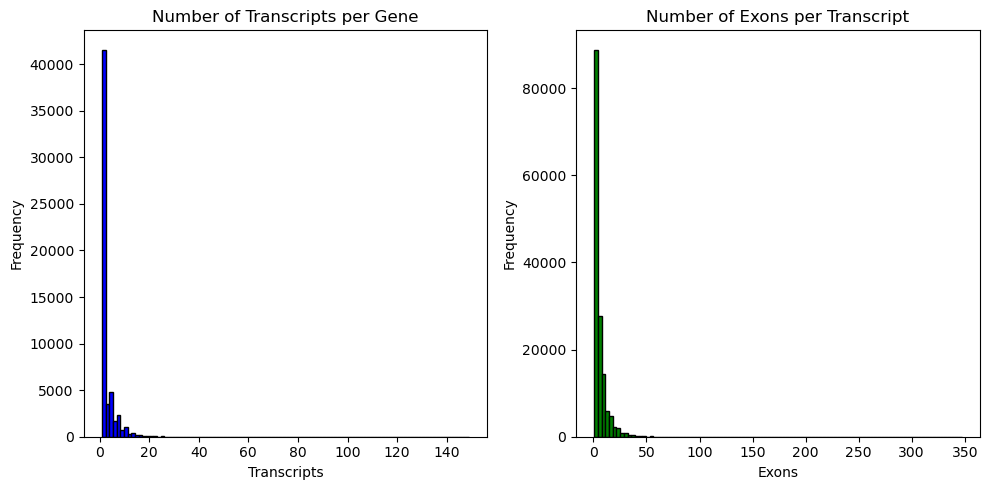

In [4]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Initialize dictionaries to store statistics
gene_dict = defaultdict(set)
transcript_dict = defaultdict(set)

# Open and read the GTF file
gtf_file_path = 'gencode.vM35.annotation.gtf'

with open(gtf_file_path, 'r') as file:
    for line in file:
        # Skip header lines
        if line.startswith("#"):
            continue
        
        # Split the line into fields
        fields = line.strip().split('\t')
        
        # Only focus on lines that describe exons
        if fields[2] == "exon":
            # Parse the attributes column (the 9th column)
            attributes_field = fields[8]
            attributes = {}
            for attribute in attributes_field.split(';'):
                if attribute.strip():
                    key, value = attribute.strip().split(' ')
                    attributes[key] = value.strip('"')
            
            # Extract gene_id and transcript_id
            gene_id = attributes['gene_id']
            transcript_id = attributes['transcript_id']
            
            # Store transcript and exon data
            gene_dict[gene_id].add(transcript_id)
            transcript_dict[transcript_id].add(fields[3])  # Exon start position

# Count transcripts per gene and exons per transcript
transcripts_per_gene = [len(transcripts) for transcripts in gene_dict.values()]
exons_per_transcript = [len(exons) for exons in transcript_dict.values()]

# Plot the statistics using histograms
plt.figure(figsize=(10, 5))

# Histogram for transcripts per gene
plt.subplot(1, 2, 1)
plt.hist(transcripts_per_gene, bins=100, color='blue',
         edgecolor='black', log=False)
plt.title('Number of Transcripts per Gene')
plt.xlabel('Transcripts')
plt.ylabel('Frequency')

# Histogram for exons per transcript
plt.subplot(1, 2, 2)
plt.hist(exons_per_transcript, bins=100, color='green',
         edgecolor='black', log=False)
plt.title('Number of Exons per Transcript')
plt.xlabel('Exons')
plt.ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

The figures above are too skewed to the left. Please make y-axis into log scale to have a better view.

```python
plt.hist(exons_per_transcript, bins=100, color='green',
         edgecolor='black', log=True)
```

### 6. Wrapping the codes into functions

For better readability and organization, we can wrap the codes into functions.

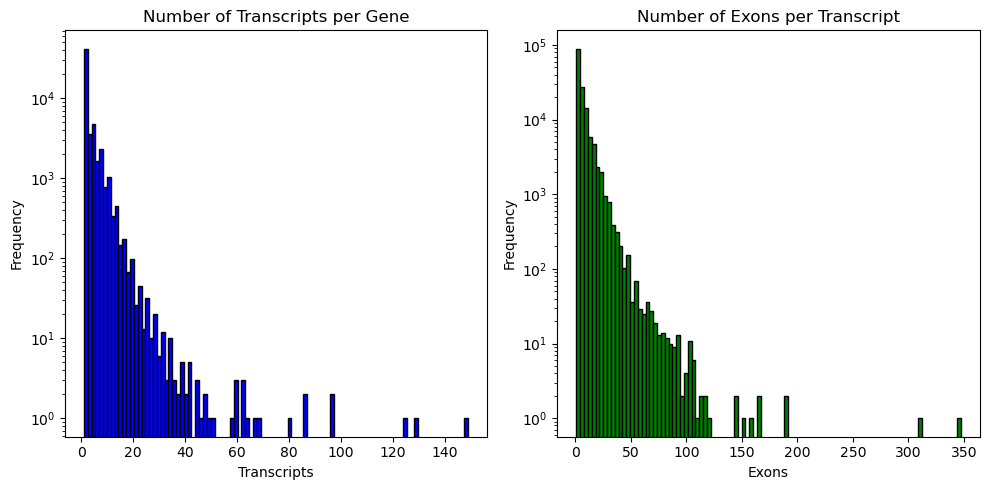

In [5]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to parse GTF file and collect statistics
def parse_gtf(gtf_file):
    gene_dict = defaultdict(set)
    transcript_dict = defaultdict(set)
    
    with open(gtf_file, 'r') as file:
        for line in file:
            if line.startswith("#"):  # Skip header lines
                continue
            fields = line.strip().split('\t')
            if fields[2] == "exon":  # Only focus on exons
                attributes = parse_attributes(fields[8])
                gene_id = attributes['gene_id']
                transcript_id = attributes['transcript_id']
                
                # Update transcript and exon counts
                gene_dict[gene_id].add(transcript_id)
                transcript_dict[transcript_id].add(fields[3])  # Store exon start position
    
    return gene_dict, transcript_dict

# Function to parse attributes column in GTF file
def parse_attributes(attribute_string):
    attributes = {}
    for attribute in attribute_string.split(';'):
        if attribute.strip():
            key, value = attribute.strip().split(' ')
            attributes[key] = value.strip('"')
    return attributes

# Function to calculate statistics and plot histograms
def plot_statistics(gene_dict, transcript_dict):
    transcripts_per_gene = [len(transcripts) for transcripts in gene_dict.values()]
    exons_per_transcript = [len(exons) for exons in transcript_dict.values()]
    
    # Plotting histograms
    plt.figure(figsize=(10, 5))
    
    # Histogram for transcripts per gene
    plt.subplot(1, 2, 1)
    plt.hist(transcripts_per_gene, bins=100, color='blue',
             edgecolor='black', log=True)
    plt.title('Number of Transcripts per Gene')
    plt.xlabel('Transcripts')
    plt.ylabel('Frequency')
    # plt.xscale('log')  # Log scale on x-axis
    
    # Histogram for exons per transcript
    plt.subplot(1, 2, 2)
    plt.hist(exons_per_transcript, bins=100, color='green',
             edgecolor='black', log=True)
    plt.title('Number of Exons per Transcript')
    plt.xlabel('Exons')
    plt.ylabel('Frequency')
    # plt.xscale('log')  # Log scale on x-axis
    
    plt.tight_layout()
    plt.show()

# Example usage:
gtf_file_path = 'gencode.vM35.annotation.gtf'
gene_dict, transcript_dict = parse_gtf(gtf_file_path)
plot_statistics(gene_dict, transcript_dict)


### 7. Making the figures look better

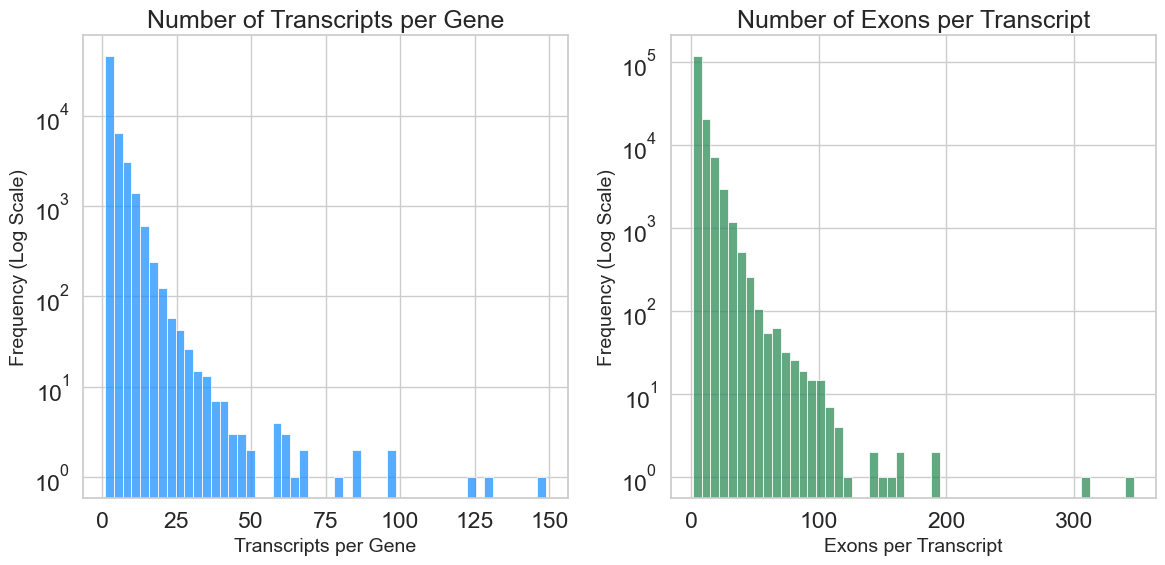

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.5)

# Function to calculate statistics and plot histograms
def plot_statistics(gene_dict, transcript_dict):
    transcripts_per_gene = [len(transcripts) for transcripts in gene_dict.values()]
    exons_per_transcript = [len(exons) for exons in transcript_dict.values()]
    
    # Create a figure with a larger size for better visibility
    plt.figure(figsize=(12, 6))
    
    # Histogram for transcripts per gene
    plt.subplot(1, 2, 1)
    sns.histplot(transcripts_per_gene, bins=50, kde=False, color='dodgerblue')
    plt.title('Number of Transcripts per Gene', fontsize=18)
    plt.xlabel('Transcripts per Gene', fontsize=14)
    plt.ylabel('Frequency (Log Scale)', fontsize=14)
    plt.yscale('log')  # Log scale on the y-axis

    # Histogram for exons per transcript
    plt.subplot(1, 2, 2)
    sns.histplot(exons_per_transcript, bins=50, kde=False, color='seagreen')
    plt.title('Number of Exons per Transcript', fontsize=18)
    plt.xlabel('Exons per Transcript', fontsize=14)
    plt.ylabel('Frequency (Log Scale)', fontsize=14)
    plt.yscale('log')  # Log scale on the y-axis
    
    # Adjust layout and spacing between plots
    plt.tight_layout()
    
    # Save the figure in a high-resolution format for publication
    plt.savefig('gene_annotation_statistics.png', dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

plot_statistics(gene_dict, transcript_dict)
